# The Complete Machine Learning

## Clasificación

### Regresión Logística (Logistic Regression)

* A pesar de llamarse "regresión", es un modelo de CLASIFICACIÓN.
* **Qué es:** Un modelo lineal que estima la **probabilidad** de que una muestra pertenezca a una clase.
* **Cómo funciona:**
    1.  Calcula una puntuación lineal (igual que la regresión lineal: $a + b_1 x_1 + \dots$).
    2.  Pasa esa puntuación a través de una **función sigmoide (o logística)**. 
    3.  La función sigmoide "aplasta" cualquier valor a un resultado entre 0 y 1 (la probabilidad).

In [31]:
import numpy as np
from sklearn.datasets import load_iris # Importar Iris en lugar de MNIST
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Para dividir en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler # ¡Sigue siendo importante!

# 1. Cargar datos de Iris
iris = load_iris(as_frame=False)
X = iris.data # Características (medidas de pétalos y sépalos)
y = iris.target # Especies (0=setosa, 1=versicolor, 2=virginica)

# 2. Crear el problema binario: ¿Es Setosa (clase 0)?
y_setosa = (y == 0) # True si es Setosa, False si no lo es

# 3. Dividir datos en entrenamiento y prueba
# Usamos todo el dataset Iris (es pequeño), dividido en 80% train, 20% test
X_train, X_test, y_train_setosa, y_test_setosa = train_test_split(
    X, y_setosa, test_size=0.2, random_state=42, stratify=y_setosa
)

# 4. Escalar los datos (¡Crucial para modelos lineales!)
scaler = StandardScaler()
# Entrenamos el scaler SÓLO con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
# Escalamos los datos de prueba con el mismo scaler
X_test_scaled = scaler.transform(X_test)

# 5. Entrenar el modelo (Regresión Logística)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_setosa) # Entrenamos con datos escalados de entrenamiento

# 6. Predecir en una muestra de prueba
# Tomamos la primera flor del CONJUNTO DE PRUEBA
some_flower = X_test_scaled[0:1] # Seleccionamos la primera muestra escalada de prueba

# Predicción de clase (True/False para Setosa)
prediction = log_reg.predict(some_flower)
# Predicción de probabilidades
probabilities = log_reg.predict_proba(some_flower)

print(f"\nPredicción para la primera flor del set de prueba:")
print(f"  ¿Es Setosa? (clase predicha): {prediction[0]}")
print(f"  Probabilidades [Prob_NO_Setosa, Prob_SI_Setosa]: {probabilities}")


Predicción para la primera flor del set de prueba:
  ¿Es Setosa? (clase predicha): False
  Probabilidades [Prob_NO_Setosa, Prob_SI_Setosa]: [[0.99647267 0.00352733]]


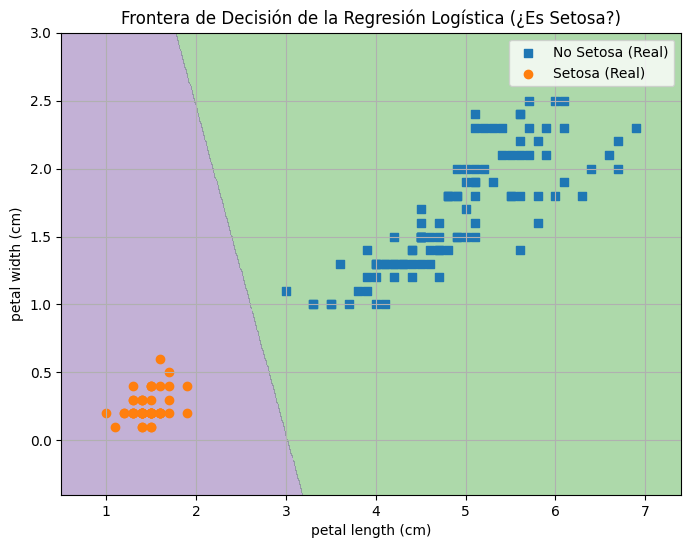

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# 1. Cargar datos de Iris (solo las 2 características que graficamos antes)
iris = load_iris(as_frame=False)
X = iris.data[:, [2, 3]] # Solo longitud (índice 2) y ancho (índice 3) del pétalo
y = iris.target
y_setosa = (y == 0) # True si es Setosa, False si no lo es

# 2. Entrenar Regresión Logística con SOLO esas 2 características
#    (No escalamos aquí para que la gráfica sea más fácil de interpretar)
log_reg_2d = LogisticRegression(random_state=42)
log_reg_2d.fit(X, y_setosa)

# 3. Crear una malla de puntos para visualizar la frontera de decisión
x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 500).reshape(-1, 1),
        np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# 4. Predecir la clase para cada punto de la malla
y_predict = log_reg_2d.predict(X_new)

# 5. Graficar las regiones de decisión y los puntos de datos
plt.figure(figsize=(8, 6))

# Dibujar las regiones coloreadas (azul=predice No Setosa, amarillo=predice Setosa)
zz = y_predict.reshape(x0.shape)
plt.contourf(x0, x1, zz, cmap=plt.cm.Paired, alpha=0.4)

# Dibujar los puntos de datos originales
plt.scatter(X[y_setosa == 0, 0], X[y_setosa == 0, 1], marker='s', label="No Setosa (Real)")
plt.scatter(X[y_setosa == 1, 0], X[y_setosa == 1, 1], marker='o', label="Setosa (Real)")

# Añadir etiquetas y título
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Frontera de Decisión de la Regresión Logística (¿Es Setosa?)")
plt.legend()
plt.grid(True)

    
### Clasificadores SGD (SGDClassifiers)

* **Qué es:** No es un modelo en sí mismo, sino un **optimizador** (`SGD` = Descenso de Gradiente Estocástico) aplicado a modelos lineales.
* **Cómo funciona:** `SGDClassifier` puede entrenar diferentes modelos (Regresión Logística, SVM Lineal) usando el optimizador SGD.
* **Sirve para:** Es extremadamente eficiente para **conjuntos de datos muy grandes (big data)** como MNIST, ya que procesa las muestras una por una o en pequeños lotes (batches), sin cargar toda la base de datos en memoria.


In [33]:
from sklearn.linear_model import SGDClassifier
# El 'scaler' (scaler) y los datos escalados (X_train_scaled, X_test_scaled)
# y las etiquetas binarias (y_train_setosa) ya fueron creados en los pasos anteriores.

# 1. Crear el modelo SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# 2. Entrenar el modelo sobre los datos de entrenamiento escalados y el problema binario
sgd_clf.fit(X_train_scaled, y_train_setosa)

# 3. Predecir en la misma muestra de prueba usada antes (la primera del set de test)
# 'some_flower' ya contiene X_test_scaled[0:1] de la celda de LogisticRegression
prediction_sgd = sgd_clf.predict(some_flower)

print(f"\nPredicción SGD para la primera flor del set de prueba:")
print(f"  ¿Es Setosa? (clase predicha): {prediction_sgd[0]}")


Predicción SGD para la primera flor del set de prueba:
  ¿Es Setosa? (clase predicha): False


### Matriz de Confusión (Confusion Matrix)

* **Qué es:** Una tabla que resume el rendimiento de un modelo comparando las predicciones con los valores reales. Es la base de todas las métricas de clasificación.
* **Estructura (para clasificación binaria):**
    * **Verdaderos Positivos (TP):** Real: 1, Pred: 1. (Acertó: Dijo "5" y *era* "5")
    * **Falsos Positivos (FP):** Real: 0, Pred: 1. (Falsa alarma: Dijo "5" pero *no era* "5")
    * **Falsos Negativos (FN):** Real: 1, Pred: 0. (Fallo: Dijo "No 5" pero *era* "5")
    * **Verdaderos Negativos (TN):** Real: 0, Pred: 0. (Acertó: Dijo "No 5" y *no era* "5")
* **Caso Multi-clase (MNIST):** La matriz se vuelve de 10x10.
    * La **diagonal principal** (de arriba-izq a abajo-der) muestra los **aciertos (TP)** para cada clase.
    * Los valores *fuera* de la diagonal son los **errores**.
    * *Interpretación:* Si la fila "Real: 7" y la columna "Pred: 9" tiene un 15, significa que el modelo confundió 15 sietes y dijo que eran nueves. 


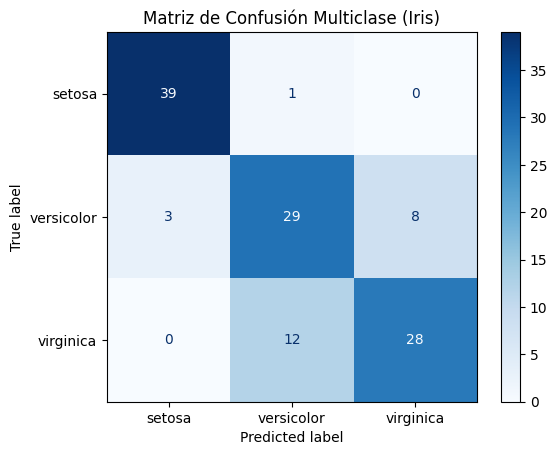

In [34]:
# 1. Cargar datos de Iris (si no están cargados)
iris = load_iris(as_frame=False)
X = iris.data
y = iris.target # Usamos las etiquetas originales (0, 1, 2)
target_names = iris.target_names # Nombres de las especies

# 2. Dividir datos en entrenamiento y prueba (para y multiclase)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Escalar los datos de entrenamiento (crea X_train_scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 4. Definir un modelo multiclase (SGDClassifier por defecto maneja multiclase)
sgd_clf_multi = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# 5. Obtener predicciones multiclase usando validación cruzada en el set de entrenamiento
# Usamos X_train_scaled y y_train (las etiquetas 0, 1, 2) que definimos arriba
y_train_pred_multi = cross_val_predict(sgd_clf_multi, X_train_scaled, y_train, cv=3)

# 6. Generar la matriz de confusión (3x3 para Iris)
cm = confusion_matrix(y_train, y_train_pred_multi)

# 7. Visualizarla
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Multiclase (Iris)")
plt.show()



### Precisión (Precision)

* **Qué es:** Mide la exactitud de las predicciones *positivas*. De todas las veces que el modelo dijo "Positivo" (ej. "Es un 5"), ¿cuántas veces acertó?
* **Fórmula:** $\text{Precisión} = \frac{TP}{TP + FP}$
* **Cuándo es importante:** Cuando el coste de un **Falso Positivo (FP)** es alto. (Ej. Filtro de SPAM: No quieres que un email importante (FP) caiga en spam).


### Sensibilidad (Recall / Exhaustividad)

* **Qué es:** Mide la capacidad del modelo para *encontrar* todos los casos positivos. De todos los positivos *reales* (ej. todos los "5" reales), ¿cuántos encontró el modelo?
* **Fórmula:** $\text{Sensibilidad (Recall)} = \frac{TP}{TP + FN}$
* **Cuándo es importante:** Cuando el coste de un **Falso Negativo (FN)** es alto. (Ej. Diagnóstico de cáncer: No quieres "pasar por alto" a un paciente enfermo (FN)).


### Puntuación F1 (F1 Score)

* **Qué es:** La **media armónica** de la Precisión y la Sensibilidad.
* **Fórmula:** $F1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}$
* **Sirve para:** Proporcionar una **métrica única** que equilibra ambas. Es la métrica estándar cuando se trabaja con **clases desbalanceadas** (ej. 99% "No Fraude", 1% "Fraude").


In [35]:
# Assuming imports and previous setup (log_reg model trained on y_train_setosa, X_train_scaled) are done
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Obtener predicciones para el problema binario "es Setosa" usando validación cruzada
# Using the log_reg model trained on Iris Setosa data
y_train_pred_setosa = cross_val_predict(log_reg, X_train_scaled, y_train_setosa, cv=3)

# 2. Calcular métricas para la clase 'Setosa' (True)
prec_setosa = precision_score(y_train_setosa, y_train_pred_setosa, pos_label=True)
rec_setosa = recall_score(y_train_setosa, y_train_pred_setosa, pos_label=True)
f1_setosa = f1_score(y_train_setosa, y_train_pred_setosa, pos_label=True)

print(f"\nMétricas para la clase 'Setosa' (calculadas sobre el set de entrenamiento):")
print(f"  Precisión: {prec_setosa:.4f}")
print(f"  Recall (Sensibilidad): {rec_setosa:.4f}")
print(f"  Puntuación F1: {f1_setosa:.4f}")



Métricas para la clase 'Setosa' (calculadas sobre el set de entrenamiento):
  Precisión: 0.9737
  Recall (Sensibilidad): 0.9250
  Puntuación F1: 0.9487


### Compensación Precisión-Sensibilidad (Precision-Recall Tradeoff)

* **Qué es:** La relación inversa entre Precisión y Recall. **No se pueden tener ambas al 100%**. (Concepto para Clasificación Binaria).
* **Cómo funciona:** Los clasificadores (como Regresión Logística) no predicen `True` o `False` directamente; calculan una *puntuación (score)*.
    * El **Umbral (Threshold)** decide el corte (por defecto, 0.5 de prob. o 0 de score).
    * Si 📈 **aumentamos el umbral**: Seremos más exigentes para predecir `True`. Los `FP` bajarán (⬆️ Precisión), pero se nos "escaparán" más positivos (⬇️ Recall).
    * Si 📉 **disminuimos el umbral**: Seremos menos exigentes. Encontraremos más positivos (⬆️ Recall), pero también tendremos más falsas alarmas (⬇️ Precisión).
    ```python


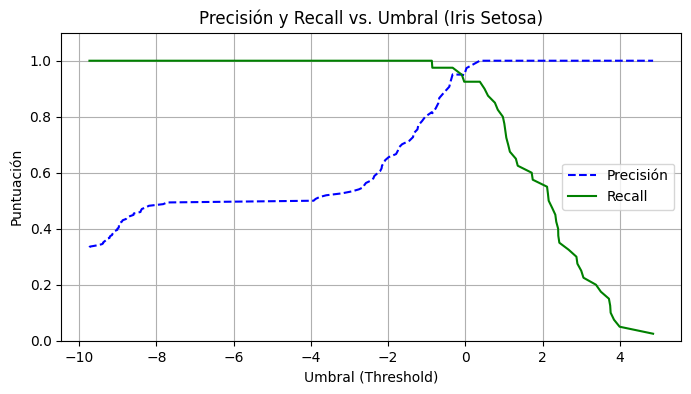

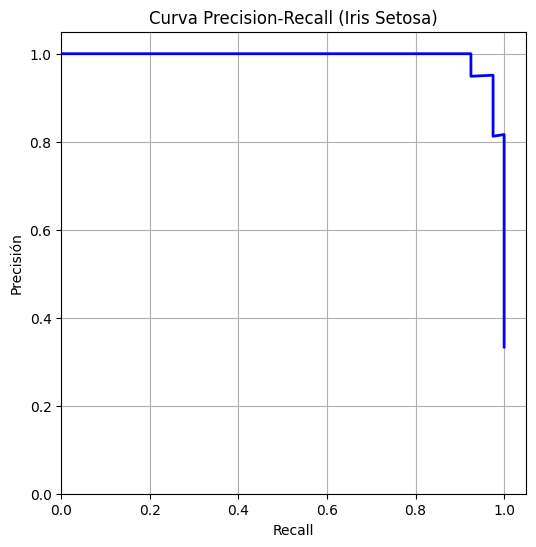

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 1. Obtener los "scores" (salida de decision_function) para el problema binario Iris
y_scores_setosa = cross_val_predict(log_reg, X_train_scaled, y_train_setosa, cv=3,
                                    method="decision_function")

# 2. Calcular precisiones y recalls para diferentes umbrales
precisions, recalls, thresholds = precision_recall_curve(y_train_setosa, y_scores_setosa)

# 3. Graficar Precision y Recall vs Umbral
plt.figure(figsize=(8, 4)) # Ajustar tamaño si es necesario
plt.plot(thresholds, precisions[:-1], "b--", label="Precisión")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Umbral (Threshold)")
plt.ylabel("Puntuación")
plt.legend(loc="center right")
plt.ylim([0, 1.1])
plt.title("Precisión y Recall vs. Umbral (Iris Setosa)")
plt.grid(True)

plt.show()

# 4. Graficar Precision vs Recall directamente
plt.figure(figsize=(6, 6)) # Ajustar tamaño si es necesario
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Curva Precision-Recall (Iris Setosa)")
plt.axis([0, 1.05, 0, 1.05]) # Ajustar ejes
plt.grid(True)

plt.show()

### Curva ROC (ROC Curve)

* **Qué es:** Otra gráfica para evaluar el rendimiento de un clasificador binario a medida que se varía el umbral.
* **Ejes:**
    * **Eje Y: Tasa de Verdaderos Positivos (TPR)**. Es lo mismo que el **Recall**. $\frac{TP}{TP + FN}$
    * **Eje X: Tasa de Falsos Positivos (FPR)**. $\frac{FP}{FP + TN}$. Mide qué proporción de *negativos reales* fueron clasificados incorrectamente como positivos (falsas alarmas).
* **Interpretación:**
    * Un modelo perfecto estaría en la esquina superior izquierda (TPR=1, FPR=0).
    * Una línea diagonal (y=x) representa un clasificador aleatorio (inútil).
    * Cuanto más "arriba y a la izquierda" esté la curva, mejor es el modelo. 
* **AUC (Area Under the Curve):**
    * El **Área Bajo la Curva (AUC)** es la métrica clave. Es un número entre 0 y 1.
    * `AUC = 1`: Modelo perfecto.
    * `AUC = 0.5`: Modelo inútil (aleatorio).
* **Sirve para:** Evaluar el rendimiento *general* de un clasificador, independientemente del umbral elegido.


Área Bajo la Curva ROC (AUC): 0.9959


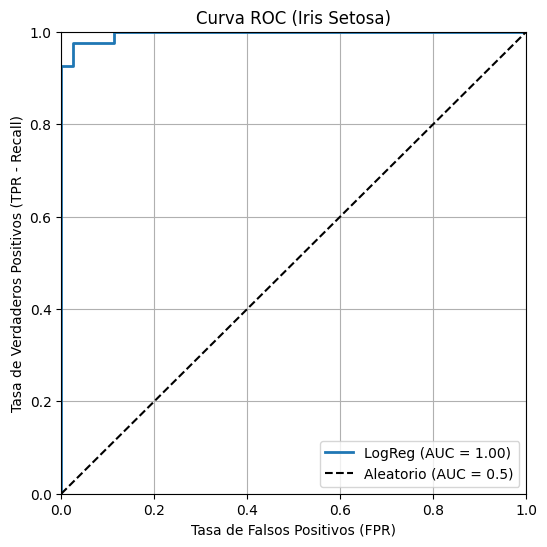

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Calcular puntos de la curva ROC (usamos 'y_scores_setosa' de la celda anterior)
fpr, tpr, thresholds_roc = roc_curve(y_train_setosa, y_scores_setosa)

# 2. Calcular el AUC
auc_score = roc_auc_score(y_train_setosa, y_scores_setosa)
print(f"Área Bajo la Curva ROC (AUC): {auc_score:.4f}")

# 3. Graficar la curva ROC
plt.figure(figsize=(6, 6)) # Ajustar tamaño si es necesario
plt.plot(fpr, tpr, linewidth=2, label=f"LogReg (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio (AUC = 0.5)") # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR - Recall)")
plt.legend(loc="lower right")
plt.title("Curva ROC (Iris Setosa)")
plt.axis([0, 1, 0, 1]) 
plt.grid(True)

plt.show()